In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [118]:
todaydate = datetime.today().strftime('%Y-%m-%d') #This will be needed for analysing the date type attributes
todaydate

'2021-03-04'

In [119]:
# Read data - members.csv
member_df = pd.read_csv('data/members_v3.csv')
member_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [120]:
#Check for duplicates msno in members_v3.csv
member_df.duplicated(subset='msno').sum()

0

In [121]:
#Calculate percentage of missing values for each column attribute
member_df.isna().sum() / len(member_df) * 100

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    65.433528
registered_via             0.000000
registration_init_time     0.000000
dtype: float64

In [122]:
# Analyse gender column
member_df.gender.describe()

count     2339968
unique          2
top          male
freq      1195355
Name: gender, dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

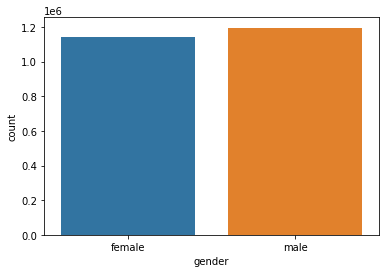

In [123]:
sns.countplot(x='gender', data=member_df)

In [124]:
# dropping gender as it has 65% of missing data
member_df = member_df.drop(columns='gender')

In [125]:
member_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [126]:
member_df.msno.value_counts() # ceck if duplicate users present or not

u7ZXL6LrpdBQZuNq8Hb4iTWPGqGU78FxSGFW0Pjvrsk=    1
QqPVkZvElabNKLb7+weeVeFsKXALOsjOGsyfh07pRYU=    1
VDFyGfDBlm0B73BgLPxJNTNcnKms3lyHCOy1EQjiUIk=    1
TKeYu0BeEfoORNCEDeksZALlbqxbL54WkY1oauqNJoI=    1
M1M2t8uEimPZENwC0WN2vAgVJXn1PS72BVKnjo700TI=    1
                                               ..
E9Gj+knT3OsZnw42y2esrgTm806F6sLZerQDTpXCAMc=    1
U5Mzd4udVClrVwN+wIOUVa7xe14rQHoAfbKNP81JaU4=    1
SatQh5ArK9YCWFVA0CaTap5wUCvRLZc4LSp1X9SDoJU=    1
HYG+19N/1VQsfOoTueFnRymBb3ngADgYy0C9P6f7GbQ=    1
C3O0IOxUZGs3XLkc+O+/IG0bLb5vLGfrEFgSbnzG+1k=    1
Name: msno, Length: 6769473, dtype: int64

In [127]:
# Analyse bd column
member_df.bd.value_counts()

 0       4540215
 22       112200
 21       110574
 20       110452
 27       102769
          ...   
 1053          1
 1056          1
 1058          1
 1061          1
-5             1
Name: bd, Length: 386, dtype: int64

In [128]:
member_df.bd.value_counts()/ len(member_df) * 100

 0       67.068958
 22       1.657441
 21       1.633421
 20       1.631619
 27       1.518124
           ...    
 1053     0.000015
 1056     0.000015
 1058     0.000015
 1061     0.000015
-5        0.000015
Name: bd, Length: 386, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20c7b90bca0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c7b9213a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c7b90b940>],
 'medians': [<matplotlib.lines.Line2D at 0x20c7b921a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c7b921dc0>],
 'means': []}

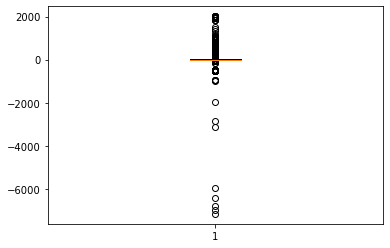

In [129]:
plt.ion()
plt.boxplot(member_df['bd'])

In [130]:
# attribute "bd" is having more than 65% values as incorrect, hence dropping this column
member_df = member_df.drop(columns='bd')

In [131]:
member_df.describe()

,city,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,2.361398e+00,2.318601e+04
min,1.000000e+00,-1.000000e+00,2.004033e+07
25%,1.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,7.000000e+00,2.016060e+07
max,2.200000e+01,1.900000e+01,2.017043e+07


In [132]:
member_df.city.value_counts()

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64

In [133]:
member_df.city.value_counts()/ len(member_df) * 100

1     70.970458
5      5.688316
13     4.741551
4      3.646488
22     3.108174
15     2.809864
6      1.997201
14     1.328612
12     0.987418
9      0.703733
11     0.701517
8      0.679152
18     0.561920
10     0.479831
21     0.455530
17     0.410254
3      0.403015
7      0.171505
16     0.075220
20     0.062531
19     0.017712
Name: city, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20c7b976730>,
 'caps': [<matplotlib.lines.Line2D at 0x20c7b976df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c7b9763d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c7b9814f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c7b981850>],
 'means': []}

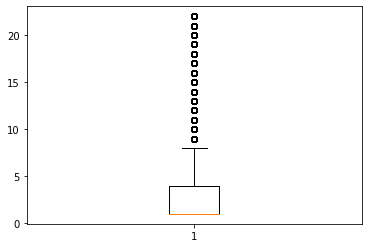

In [134]:
plt.ion()
plt.boxplot(member_df['city'])

In [135]:
# Analyse registration_init_time
#Convert String to Date
member_df['registration_init_time']=pd.to_datetime(member_df['registration_init_time'], format='%Y%m%d')
member_df.head()

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15


In [136]:
member_df[member_df['registration_init_time'] > todaydate]

,msno,city,registered_via,registration_init_time


In [137]:
# Implies no incorrect values in registration_init_time

In [138]:
member_df.count()

msno                      6769473
city                      6769473
registered_via            6769473
registration_init_time    6769473
dtype: int64

In [139]:
member_df.head()

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15


In [140]:
member_df

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15
...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,7,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,7,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,4,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,4,2015-10-20


In [141]:
# Read data - user_logs.csv
user_logs_df = pd.read_csv('data/user_logs_v2.csv')
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [142]:
user_logs_df

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558
...,...,...,...,...,...,...,...,...,...
18396357,FGpiy2mB+vXLKziYRcY/xJcJEFJfRDfUqlU+p760f7E=,20170314,0,0,0,0,1,1,248.058
18396358,iZRjKNMrw5ffEbfXODLhV/0tJLPbOH3am1WYDgqBf8Q=,20170306,0,0,0,0,1,1,311.000
18396359,yztw4Y0EggG0w2wPkbMZx7ke7saSx7dLSfMheHZG/DQ=,20170331,0,0,0,0,17,1,3973.189
18396360,swCHwkNx30/aENjq30qqaLlm7bUUytbMXdz1bH7g0Jk=,20170307,0,0,0,1,0,1,179.278


In [143]:
user_logs_df.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [144]:
#Check for dupliacte msno in user_logs
user_logs_df.duplicated(subset='msno').sum()

17292468

In [145]:
user_logs_df.msno.value_counts() # there are duplicate values

qbwdgtmIYn2A6skOo1pxJHbYQ88Bq1cFdG4OMOAzxD8=    31
UVRZ4nwscwJxEGW8gjbAzzcd9yE90LK87d2ihd6x22c=    31
a6eFdcxT+d0Q0NCdeMZIJ6OAM5FDK+Rw2cu818ImNKY=    31
GeeDitC7fHoaJAW79rVq/A3+k7KspoXYykFfuMZYAH0=    31
2dKlWj/2UstZtqzVZxAHNJG3+oV0kOOuOmNkI90v4e0=    31
                                                ..
BS/P+u/nQYd5Jj74Rlwjc0kxkw/tDZM9Uatemy1DGxo=     1
nkWrokoQECkWleLuVy8xL7jTPTI5Cio9t6iD1t58nqQ=     1
AKjgT/J+RyvwdBV8iDKIRcgCZej1AQeJYUdSvpxy2mw=     1
veM37wOiGFry6vuQemXWmHrZn1ArAOTXVWF1UmmUoUE=     1
nua2PWDBm0rkpe1ySqnvdhk7yoKcxNG56bRFXP6JV1A=     1
Name: msno, Length: 1103894, dtype: int64

In [146]:
# Calculate % of missing values for each column attribute
user_logs_df.isna().sum() / len(member_df) * 100

msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64

In [147]:
#Convert String to Date in "date" column
user_logs_df['date']=pd.to_datetime(user_logs_df['date'], format='%Y%m%d')

In [148]:
user_logs_df.date.head(6)

0   2017-03-31
1   2017-03-30
2   2017-03-31
3   2017-03-31
4   2017-03-31
5   2017-03-31
Name: date, dtype: datetime64[ns]

In [149]:
#Check whether date is later than current date
user_logs_df[user_logs_df['date'] > todaydate]

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs


In [150]:
# Read data - transactions_v2.csv
transactions_df = pd.read_csv('data/transactions_v2.csv')
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [151]:
#Check for duplicate msno in transactions_v2.csv
transactions_df.duplicated(subset='msno').sum()

233959

In [152]:
#Check for null values for "msno" in transactions_v2.csv
transactions_df.isna().sum() / len(transactions_df) * 100

msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64

In [153]:
#Convert String to Date in "transaction_date" column
transactions_df['transaction_date']=pd.to_datetime(transactions_df['transaction_date'], format='%Y%m%d')
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,20170423,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,20170817,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,20170406,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,20170408,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,20170417,0


In [154]:
#Convert String to Date in "membership_expire_date" column
transactions_df['membership_expire_date']=pd.to_datetime(transactions_df['membership_expire_date'], format='%Y%m%d')
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,2017-08-17,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,2017-04-06,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,2017-04-08,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,2017-04-17,0


In [155]:
#Check sum of transaction_date & payment_plan_days is equal to membership_expire_date
transactions_date_df = (transactions_df['transaction_date'] + transactions_df['payment_plan_days'].map(timedelta)) == transactions_df['membership_expire_date']

In [156]:
transactions_date_df.describe()

count     1431009
unique          2
top         False
freq      1025106
dtype: object

In [157]:
transactions_date_df.head(6)

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [158]:
#Check result values for transaction date comparison with membership expirydate
transactions_date_df.value_counts()

False    1025106
True      405903
dtype: int64

In [159]:
transactions_df['msno'].value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
2Orq9gEV2NugaHvtexB6J9ClmuT6WeNt3tDFUvptckw=      1
s61tcwxK/3VwLAs6eeQHrIpOLz0whhsRRUNYnHnL174=      1
JKNeaqn/drqIlc22cGqZBfi/+mzZtWFiRM5txKXWUOY=      1
EHd/dNsE3/EjdmZIPPsUulR95bjCjJm59oWelkoYtPs=      1
2aY4fVvcDt6tfVFp2DJZ5gEXWlMPTUQWUgEe9Fut0mw=      1
Name: msno, Length: 1197050, dtype: int64

In [160]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1431009 non-null  object        
 1   payment_method_id       1431009 non-null  int64         
 2   payment_plan_days       1431009 non-null  int64         
 3   plan_list_price         1431009 non-null  int64         
 4   actual_amount_paid      1431009 non-null  int64         
 5   is_auto_renew           1431009 non-null  int64         
 6   transaction_date        1431009 non-null  datetime64[ns]
 7   membership_expire_date  1431009 non-null  datetime64[ns]
 8   is_cancel               1431009 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 98.3+ MB


In [161]:
# Read data - train_v2.csv
train_df = pd.read_csv('data/train_v2.csv')
train_df.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [162]:
train_df.duplicated(subset='msno').sum() # check for duplicate values

0

In [163]:
train_df.isna().sum() / len(train_df) * 100 # check for missing values

msno        0.0
is_churn    0.0
dtype: float64

In [164]:
# Read data - sample_submission_v2.csv
sample_submission_df = pd.read_csv('data/sample_submission_v2.csv')
sample_submission_df.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [165]:
sample_submission_df.duplicated(subset='msno').sum() # check for duplicate values

0

In [166]:
sample_submission_df.isna().sum() / len(sample_submission_df) * 100 # check for missing values

msno        0.0
is_churn    0.0
dtype: float64

## Feature Engineering

In [167]:
train_df


,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1
...,...,...
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0


In [168]:
sample_submission_df

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0
...,...,...
907466,8nS1SbsI9+9vN07m8GyfmsWv/A9H8dUlbIbjbZ2a/Nk=,0
907467,KsOpJUA4P2pEaSl0afZhyl1QBaLHXTw33IYuQsnKdxE=,0
907468,NIcI2YUj9v2tC/NRtreLz1wxwLczQacJ2Ek9RJKgarI=,0
907469,b8MlVUtzUhQrIqKcqVKPENOIUo/5EiZxfExBkkfoBxY=,0


#### member_df

In [169]:
member_df

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15
...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,7,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,7,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,4,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,4,2015-10-20


In [170]:
# Binning

# 1. registered_via attribute

encoded_columns = pd.get_dummies(member_df['registered_via'], prefix='registered_via')
member_df = member_df.join(encoded_columns)

# 2. city attribute

encoded_columns = pd.get_dummies(member_df['city'], prefix='city')
member_df = member_df.join(encoded_columns)


member_df.head()

,msno,city,registered_via,registration_init_time,registered_via_-1,registered_via_1,registered_via_2,registered_via_3,registered_via_4,registered_via_5,...,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# drop unnecessary columns
member = member_df.drop(['city', 'registered_via'], 1)
member

,msno,registration_init_time,registered_via_-1,registered_via_1,registered_via_2,registered_via_3,registered_via_4,registered_via_5,registered_via_6,registered_via_7,...,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,2011-09-11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,2011-09-14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,2011-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,2011-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,2011-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,2015-10-20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,2015-10-20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,2015-10-20,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,2015-10-20,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# merge with train & test data
train =pd.merge(train_df, member, how='left', on='msno')
test =pd.merge(sample_submission_df, member, how='left', on='msno')

#### user_logs_df

In [173]:
user_logs_df

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558
...,...,...,...,...,...,...,...,...,...
18396357,FGpiy2mB+vXLKziYRcY/xJcJEFJfRDfUqlU+p760f7E=,2017-03-14,0,0,0,0,1,1,248.058
18396358,iZRjKNMrw5ffEbfXODLhV/0tJLPbOH3am1WYDgqBf8Q=,2017-03-06,0,0,0,0,1,1,311.000
18396359,yztw4Y0EggG0w2wPkbMZx7ke7saSx7dLSfMheHZG/DQ=,2017-03-31,0,0,0,0,17,1,3973.189
18396360,swCHwkNx30/aENjq30qqaLlm7bUUytbMXdz1bH7g0Jk=,2017-03-07,0,0,0,1,0,1,179.278


In [174]:
# Aggregate multiple user enteries

user_logs_df = user_logs_df.groupby('msno', as_index=False).sum()
user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247
...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679


In [175]:
user_logs_df['total_songs_played'] = user_logs_df['num_25'] + user_logs_df['num_50'] + user_logs_df['num_75'] + user_logs_df['num_985'] + user_logs_df['num_100']

# Scaling - Convert num to fraction

user_logs_df['fraction_25'] = user_logs_df['num_25'] / user_logs_df['total_songs_played']
user_logs_df['fraction_50'] = user_logs_df['num_50'] / user_logs_df['total_songs_played']
user_logs_df['fraction_75'] = user_logs_df['num_75'] / user_logs_df['total_songs_played']
user_logs_df['fraction_985'] = user_logs_df['num_985'] / user_logs_df['total_songs_played']
user_logs_df['fraction_100'] = user_logs_df['num_100'] / user_logs_df['total_songs_played']


user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs_played,fraction_25,fraction_50,fraction_75,fraction_985,fraction_100
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425,584,0.147260,0.018836,0.017123,0.008562,0.808219
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892,1089,0.175390,0.082645,0.068871,0.132231,0.540863
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260,567,0.075838,0.021164,0.026455,0.021164,0.855379
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558,970,0.213402,0.168041,0.103093,0.065979,0.449485
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247,682,0.153959,0.035191,0.057185,0.051320,0.702346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763,1437,0.094642,0.048017,0.032011,0.042450,0.782881
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789,2154,0.007892,0.003714,0.003250,0.002786,0.982358
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725,284,0.116197,0.035211,0.042254,0.035211,0.771127
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679,245,0.040816,0.004082,0.004082,0.004082,0.946939


In [176]:
# Binning 

# 1. Perform binning on num_unq attribute
bin_labels_unq_song = ['low_unq_song', 'lower_middle_unq_song', 'upper_middle_unq_song', 'high_unq_song']
user_logs_df['num_unq_categ'] = pd.qcut(user_logs_df['num_unq'], q=[0, 0.25, 0.5, 0.75, 1], labels = bin_labels_unq_song)

# 2. Perform binning on total_secs attribute
bin_labels_total_sec = ['low_total_sec', 'lower_middle_total_sec', 'upper_middle_total_sec', 'high_total_sec']
user_logs_df['total_sec_categ'] = pd.qcut(user_logs_df['total_secs'], q=[0, 0.25, 0.5, 0.75, 1], labels = bin_labels_total_sec)

user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs_played,fraction_25,fraction_50,fraction_75,fraction_985,fraction_100,num_unq_categ,total_sec_categ
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425,584,0.147260,0.018836,0.017123,0.008562,0.808219,upper_middle_unq_song,upper_middle_total_sec
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892,1089,0.175390,0.082645,0.068871,0.132231,0.540863,high_unq_song,high_total_sec
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260,567,0.075838,0.021164,0.026455,0.021164,0.855379,upper_middle_unq_song,upper_middle_total_sec
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558,970,0.213402,0.168041,0.103093,0.065979,0.449485,high_unq_song,upper_middle_total_sec
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247,682,0.153959,0.035191,0.057185,0.051320,0.702346,lower_middle_unq_song,upper_middle_total_sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763,1437,0.094642,0.048017,0.032011,0.042450,0.782881,upper_middle_unq_song,high_total_sec
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789,2154,0.007892,0.003714,0.003250,0.002786,0.982358,high_unq_song,high_total_sec
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725,284,0.116197,0.035211,0.042254,0.035211,0.771127,lower_middle_unq_song,lower_middle_total_sec
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679,245,0.040816,0.004082,0.004082,0.004082,0.946939,lower_middle_unq_song,lower_middle_total_sec


In [177]:
# Hot Encoding

# 1. num_unq_categ

encoded_columns = pd.get_dummies(user_logs_df['num_unq_categ'])
user_logs_df = user_logs_df.join(encoded_columns)

# 2. total_sec_categ
encoded_columns = pd.get_dummies(user_logs_df['total_sec_categ'])
user_logs_df = user_logs_df.join(encoded_columns)

user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs_played,fraction_25,...,num_unq_categ,total_sec_categ,low_unq_song,lower_middle_unq_song,upper_middle_unq_song,high_unq_song,low_total_sec,lower_middle_total_sec,upper_middle_total_sec,high_total_sec
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425,584,0.147260,...,upper_middle_unq_song,upper_middle_total_sec,0,0,1,0,0,0,1,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892,1089,0.175390,...,high_unq_song,high_total_sec,0,0,0,1,0,0,0,1
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260,567,0.075838,...,upper_middle_unq_song,upper_middle_total_sec,0,0,1,0,0,0,1,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558,970,0.213402,...,high_unq_song,upper_middle_total_sec,0,0,0,1,0,0,1,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247,682,0.153959,...,lower_middle_unq_song,upper_middle_total_sec,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763,1437,0.094642,...,upper_middle_unq_song,high_total_sec,0,0,1,0,0,0,0,1
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789,2154,0.007892,...,high_unq_song,high_total_sec,0,0,0,1,0,0,0,1
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725,284,0.116197,...,lower_middle_unq_song,lower_middle_total_sec,0,1,0,0,0,1,0,0
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679,245,0.040816,...,lower_middle_unq_song,lower_middle_total_sec,0,1,0,0,0,1,0,0


In [178]:
user_logs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103894 entries, 0 to 1103893
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   msno                    1103894 non-null  object  
 1   num_25                  1103894 non-null  int64   
 2   num_50                  1103894 non-null  int64   
 3   num_75                  1103894 non-null  int64   
 4   num_985                 1103894 non-null  int64   
 5   num_100                 1103894 non-null  int64   
 6   num_unq                 1103894 non-null  int64   
 7   total_secs              1103894 non-null  float64 
 8   total_songs_played      1103894 non-null  int64   
 9   fraction_25             1103894 non-null  float64 
 10  fraction_50             1103894 non-null  float64 
 11  fraction_75             1103894 non-null  float64 
 12  fraction_985            1103894 non-null  float64 
 13  fraction_100            1103894 non-null  

In [179]:
# drop unnecessary columns
user_logs = user_logs_df.drop(['num_25', 'num_50','num_75', 'num_985', 'num_100', 'num_unq', 'num_unq_categ', 'total_sec_categ', 'total_secs', 'total_songs_played' ], 1)
user_logs

,msno,fraction_25,fraction_50,fraction_75,fraction_985,fraction_100,low_unq_song,lower_middle_unq_song,upper_middle_unq_song,high_unq_song,low_total_sec,lower_middle_total_sec,upper_middle_total_sec,high_total_sec
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0.147260,0.018836,0.017123,0.008562,0.808219,0,0,1,0,0,0,1,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.175390,0.082645,0.068871,0.132231,0.540863,0,0,0,1,0,0,0,1
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.075838,0.021164,0.026455,0.021164,0.855379,0,0,1,0,0,0,1,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.213402,0.168041,0.103093,0.065979,0.449485,0,0,0,1,0,0,1,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.153959,0.035191,0.057185,0.051320,0.702346,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0.094642,0.048017,0.032011,0.042450,0.782881,0,0,1,0,0,0,0,1
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0.007892,0.003714,0.003250,0.002786,0.982358,0,0,0,1,0,0,0,1
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0.116197,0.035211,0.042254,0.035211,0.771127,0,1,0,0,0,1,0,0
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,0.040816,0.004082,0.004082,0.004082,0.946939,0,1,0,0,0,1,0,0


In [180]:
# merge with train & test data
train =pd.merge(train, user_logs, how='left', on='msno')
test =pd.merge(test, user_logs, how='left', on='msno')


#### transaction_df

In [181]:
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,2017-08-17,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,2017-04-06,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,2017-04-08,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,2017-04-17,0


In [182]:
transactions_df['msno'].value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
2Orq9gEV2NugaHvtexB6J9ClmuT6WeNt3tDFUvptckw=      1
s61tcwxK/3VwLAs6eeQHrIpOLz0whhsRRUNYnHnL174=      1
JKNeaqn/drqIlc22cGqZBfi/+mzZtWFiRM5txKXWUOY=      1
EHd/dNsE3/EjdmZIPPsUulR95bjCjJm59oWelkoYtPs=      1
2aY4fVvcDt6tfVFp2DJZ5gEXWlMPTUQWUgEe9Fut0mw=      1
Name: msno, Length: 1197050, dtype: int64

In [183]:
# Aggregate multiple user entries

transactions_df.sort_values('membership_expire_date')

transactions_df['total_order'] = 1

transactions_df_grouped = transactions_df.groupby('msno').agg(
    total_orders=pd.NamedAgg(column='total_order', aggfunc='sum'),
    plan_list_price_total=pd.NamedAgg(column='plan_list_price', aggfunc='sum'),
    payment_plan_days_total=pd.NamedAgg(column='payment_plan_days', aggfunc='sum'),
    actual_amount_paid_total=pd.NamedAgg(column='actual_amount_paid', aggfunc='sum'),
    actual_amount_paid_mean=pd.NamedAgg(column='actual_amount_paid', aggfunc='mean'),
    auto_renew_times=pd.NamedAgg(column='is_auto_renew', aggfunc=lambda x : sum(x==1)),
    cancel_times=pd.NamedAgg(column='is_cancel', aggfunc=lambda x : sum(x==1)),
    membership_expire_date_recent=pd.NamedAgg(column='membership_expire_date', aggfunc='max')
)

In [184]:
transactions_df.msno.value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
2Orq9gEV2NugaHvtexB6J9ClmuT6WeNt3tDFUvptckw=      1
s61tcwxK/3VwLAs6eeQHrIpOLz0whhsRRUNYnHnL174=      1
JKNeaqn/drqIlc22cGqZBfi/+mzZtWFiRM5txKXWUOY=      1
EHd/dNsE3/EjdmZIPPsUulR95bjCjJm59oWelkoYtPs=      1
2aY4fVvcDt6tfVFp2DJZ5gEXWlMPTUQWUgEe9Fut0mw=      1
Name: msno, Length: 1197050, dtype: int64

In [185]:
transactions_df_grouped


,total_orders,plan_list_price_total,payment_plan_days_total,actual_amount_paid_total,actual_amount_paid_mean,auto_renew_times,cancel_times,membership_expire_date_recent
msno,,,,,,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1,1599,395,1599,1599.0,0,0,2018-02-06
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,99,30,99,99.0,1,0,2017-04-15
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2,298,60,298,149.0,2,0,2017-05-19
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,149,30,149,149.0,1,0,2017-04-26
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,149,30,149,149.0,1,0,2017-04-15
...,...,...,...,...,...,...,...,...
zzy0oyiTnRTo5Mbg23oKbBkf9eoaS7+eU4V+d14bzfY=,1,894,195,894,894.0,0,0,2017-05-27
zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,180,30,180,180.0,0,0,2017-04-01
zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,1,180,30,180,180.0,0,0,2017-04-10


In [186]:
transactions_df_grouped.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1197050 entries, +++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s= to zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=
Data columns (total 8 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   total_orders                   1197050 non-null  int64         
 1   plan_list_price_total          1197050 non-null  int64         
 2   payment_plan_days_total        1197050 non-null  int64         
 3   actual_amount_paid_total       1197050 non-null  int64         
 4   actual_amount_paid_mean        1197050 non-null  float64       
 5   auto_renew_times               1197050 non-null  int64         
 6   cancel_times                   1197050 non-null  int64         
 7   membership_expire_date_recent  1197050 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 82.2+ MB


In [187]:
# Scaling

# 1. total_orders
transactions_df_grouped['total_orders'] = (transactions_df_grouped['total_orders'] - transactions_df_grouped['total_orders'].min()) / (transactions_df_grouped['total_orders'].max() - transactions_df_grouped['total_orders'].min())

# 2. plan_list_price_total
transactions_df_grouped['plan_list_price_total'] = (transactions_df_grouped['plan_list_price_total'] - transactions_df_grouped['plan_list_price_total'].min()) / (transactions_df_grouped['plan_list_price_total'].max() - transactions_df_grouped['plan_list_price_total'].min())

# 3. payment_plan_days_total
transactions_df_grouped['payment_plan_days_total'] = (transactions_df_grouped['payment_plan_days_total'] - transactions_df_grouped['payment_plan_days_total'].min()) / (transactions_df_grouped['payment_plan_days_total'].max() - transactions_df_grouped['payment_plan_days_total'].min())

# 4. actual_amount_paid_total
transactions_df_grouped['actual_amount_paid_total'] = (transactions_df_grouped['actual_amount_paid_total'] - transactions_df_grouped['actual_amount_paid_total'].min()) / (transactions_df_grouped['actual_amount_paid_total'].max() - transactions_df_grouped['actual_amount_paid_total'].min())

# 5. actual_amount_paid_mean
transactions_df_grouped['actual_amount_paid_mean'] = (transactions_df_grouped['actual_amount_paid_mean'] - transactions_df_grouped['actual_amount_paid_mean'].min()) / (transactions_df_grouped['actual_amount_paid_mean'].max() - transactions_df_grouped['actual_amount_paid_mean'].min())

# 6. auto_renew_times
transactions_df_grouped['auto_renew_times'] = (transactions_df_grouped['auto_renew_times'] - transactions_df_grouped['auto_renew_times'].min()) / (transactions_df_grouped['auto_renew_times'].max() - transactions_df_grouped['auto_renew_times'].min())

# 7. cancel_times
transactions_df_grouped['cancel_times'] = (transactions_df_grouped['cancel_times'] - transactions_df_grouped['cancel_times'].min()) / (transactions_df_grouped['cancel_times'].max() - transactions_df_grouped['cancel_times'].min())


In [188]:
transactions_df_grouped

,total_orders,plan_list_price_total,payment_plan_days_total,actual_amount_paid_total,actual_amount_paid_mean,auto_renew_times,cancel_times,membership_expire_date_recent
msno,,,,,,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0.000000,0.048124,0.053851,0.048124,0.7995,0.000000,0.0,2018-02-06
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.000000,0.002980,0.004090,0.002980,0.0495,0.015385,0.0,2017-04-15
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.004831,0.008969,0.008180,0.008969,0.0745,0.030769,0.0,2017-05-19
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.000000,0.004484,0.004090,0.004484,0.0745,0.015385,0.0,2017-04-26
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.000000,0.004484,0.004090,0.004484,0.0745,0.015385,0.0,2017-04-15
...,...,...,...,...,...,...,...,...
zzy0oyiTnRTo5Mbg23oKbBkf9eoaS7+eU4V+d14bzfY=,0.000000,0.026906,0.026585,0.026906,0.4470,0.000000,0.0,2017-05-27
zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0.000000,0.005417,0.004090,0.005417,0.0900,0.000000,0.0,2017-04-01
zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0.000000,0.005417,0.004090,0.005417,0.0900,0.000000,0.0,2017-04-10


In [189]:
# merge with train & test data
train =pd.merge(train, transactions_df_grouped, how='left', on='msno')
test =pd.merge(test, transactions_df_grouped, how='left', on='msno')

In [190]:
train


,msno,is_churn,registration_init_time,registered_via_-1,registered_via_1,registered_via_2,registered_via_3,registered_via_4,registered_via_5,registered_via_6,...,upper_middle_total_sec,high_total_sec,total_orders,plan_list_price_total,payment_plan_days_total,actual_amount_paid_total,actual_amount_paid_mean,auto_renew_times,cancel_times,membership_expire_date_recent
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,2013-12-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,2013-12-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.005417,0.00409,0.005417,0.0900,0.000000,0.000,2017-04-11
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,2013-12-27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.004831,0.009029,0.02045,0.009029,0.0750,0.000000,0.000,2017-06-15
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,2014-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.043478,0.044843,0.04090,0.044843,0.0745,0.153846,0.000,2018-01-08
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,2014-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.033816,0.023836,0.03272,0.023836,0.0495,0.123077,0.125,2017-09-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,2011-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.004484,0.00409,0.004484,0.0745,0.015385,0.000,2017-04-03
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0,2011-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.002980,0.00409,0.002980,0.0495,0.015385,0.000,2017-04-10
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0,2011-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.002980,0.00409,0.002980,0.0495,0.015385,0.000,2017-04-16
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,2011-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.004831,0.008969,0.00818,0.008969,0.0745,0.030769,0.000,2017-05-13


In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   msno                           970960 non-null  object        
 1   is_churn                       970960 non-null  int64         
 2   registration_init_time         860967 non-null  datetime64[ns]
 3   registered_via_-1              860967 non-null  float64       
 4   registered_via_1               860967 non-null  float64       
 5   registered_via_2               860967 non-null  float64       
 6   registered_via_3               860967 non-null  float64       
 7   registered_via_4               860967 non-null  float64       
 8   registered_via_5               860967 non-null  float64       
 9   registered_via_6               860967 non-null  float64       
 10  registered_via_7               860967 non-null  float64       
 11  

In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   msno                           907471 non-null  object        
 1   is_churn                       907471 non-null  int64         
 2   registration_init_time         795090 non-null  datetime64[ns]
 3   registered_via_-1              795090 non-null  float64       
 4   registered_via_1               795090 non-null  float64       
 5   registered_via_2               795090 non-null  float64       
 6   registered_via_3               795090 non-null  float64       
 7   registered_via_4               795090 non-null  float64       
 8   registered_via_5               795090 non-null  float64       
 9   registered_via_6               795090 non-null  float64       
 10  registered_via_7               795090 non-null  float64       
 11  

In [193]:
train.isna().sum() / len(train) * 100

msno                              0.000000
is_churn                          0.000000
registration_init_time           11.328273
registered_via_-1                11.328273
registered_via_1                 11.328273
                                   ...    
actual_amount_paid_total          3.850004
actual_amount_paid_mean           3.850004
auto_renew_times                  3.850004
cancel_times                      3.850004
membership_expire_date_recent     3.850004
Length: 63, dtype: float64

In [194]:
test.isna().sum() / len(test) * 100

msno                              0.000000
is_churn                          0.000000
registration_init_time           12.383977
registered_via_-1                12.383977
registered_via_1                 12.383977
                                   ...    
actual_amount_paid_total          0.000110
actual_amount_paid_mean           0.000110
auto_renew_times                  0.000110
cancel_times                      0.000110
membership_expire_date_recent     0.000110
Length: 63, dtype: float64

In [195]:
# fill na values for train & test data set

# categorical columns
categorical_columns = ['registered_via_-1', 'registered_via_1', 'registered_via_2', 'registered_via_3', 'registered_via_4',
            'registered_via_5', 'registered_via_6', 'registered_via_7', 'registered_via_8', 'registered_via_9',
            'registered_via_10', 'registered_via_11', 'registered_via_13', 'registered_via_14',
            'registered_via_16', 'registered_via_17', 'registered_via_18', 'registered_via_19',
            'city_1', 'city_3', 'city_4', 'city_5', 'city_6', 'city_7', 'city_8', 'city_9', 'city_10', 'city_11',
            'city_12', 'city_13','city_14',  'city_15', 'city_16', 'city_17', 'city_18', 'city_19','city_20', 
            'city_21', 'city_22', 'low_unq_song', 'lower_middle_unq_song', 'upper_middle_unq_song', 'high_unq_song',
            'low_total_sec', 'lower_middle_total_sec', 'upper_middle_total_sec', 'high_total_sec']

for column in categorical_columns:
    train[column].fillna(train[column].mode()[0], inplace=True)
    test[column].fillna(test[column].mode()[0], inplace=True)
        

# numerical columns
numerical_columns = ['registration_init_time', 'total_orders', 'plan_list_price_total', 'payment_plan_days_total', 'actual_amount_paid_total', 'actual_amount_paid_mean',
                    'auto_renew_times', 'cancel_times', 'membership_expire_date_recent']

for column in numerical_columns:
    train[column].fillna(train[column].mean(), inplace=True)
    test[column].fillna(test[column].mean(), inplace=True)


In [196]:
# Extract features from date & drop datetime columns

# 1. Feature extraction

train['days'] = (train['membership_expire_date_recent'] - train['registration_init_time']).dt.days
test['days'] = (test['membership_expire_date_recent'] - test['registration_init_time']).dt.days

# 1.1 Normalize

train['days'] = (train['days'] - train['days'].min()) / (train['days'].max() - train['days'].min())
test['days'] = (test['days'] - test['days'].min()) / (test['days'].max() - test['days'].min())

# 2. Drop unnecessary columns

train = train.drop(['membership_expire_date_recent', 'registration_init_time'], 1)
test = test.drop(['membership_expire_date_recent', 'registration_init_time'], 1)


In [197]:
train.isna().sum()

msno                        0
is_churn                    0
registered_via_-1           0
registered_via_1            0
registered_via_2            0
                           ..
actual_amount_paid_total    0
actual_amount_paid_mean     0
auto_renew_times            0
cancel_times                0
days                        0
Length: 62, dtype: int64

In [198]:
test.isna().sum()

msno                        0
is_churn                    0
registered_via_-1           0
registered_via_1            0
registered_via_2            0
                           ..
actual_amount_paid_total    0
actual_amount_paid_mean     0
auto_renew_times            0
cancel_times                0
days                        0
Length: 62, dtype: int64

## Top features

In [199]:
train.corr()['is_churn'].sort_values(ascending=False).head(11)

is_churn                    1.000000
actual_amount_paid_mean     0.354868
payment_plan_days_total     0.352293
cancel_times                0.342849
plan_list_price_total       0.328600
actual_amount_paid_total    0.322323
total_orders                0.123815
registered_via_4            0.118185
registered_via_3            0.100962
registered_via_9            0.073004
auto_renew_times            0.045047
Name: is_churn, dtype: float64

In [200]:
train.corr()['is_churn'].sort_values(ascending=True).head(10)

registered_via_7         -0.182445
city_1                   -0.112445
upper_middle_unq_song    -0.016976
upper_middle_total_sec   -0.015618
high_total_sec           -0.015262
high_unq_song            -0.013463
fraction_100             -0.007530
lower_middle_total_sec   -0.002121
lower_middle_unq_song    -0.001376
fraction_25              -0.000909
Name: is_churn, dtype: float64

## Model Building

In [274]:
#subseting the datat based on top features 
train_data= train[['is_churn', 'actual_amount_paid_mean', 'payment_plan_days_total', 'cancel_times', 'plan_list_price_total', 'actual_amount_paid_total', 'total_orders', 'registered_via_4', 'registered_via_3', 'registered_via_9', 'auto_renew_times'] ] 

In [203]:
train_data

,is_churn,actual_amount_paid_mean,payment_plan_days_total,cancel_times,plan_list_price_total,actual_amount_paid_total,total_orders,registered_via_4,registered_via_3,registered_via_9,auto_renew_times
0,1,0.071881,0.005548,0.004403,0.005311,0.005292,0.001027,0.0,1.0,0.0,0.017094
1,1,0.090000,0.004090,0.000000,0.005417,0.005417,0.000000,0.0,1.0,0.0,0.000000
2,1,0.075000,0.020450,0.000000,0.009029,0.009029,0.004831,0.0,1.0,0.0,0.000000
3,1,0.074500,0.040900,0.000000,0.044843,0.044843,0.043478,0.0,0.0,0.0,0.153846
4,1,0.049500,0.032720,0.125000,0.023836,0.023836,0.033816,0.0,0.0,0.0,0.123077
...,...,...,...,...,...,...,...,...,...,...,...
970955,0,0.074500,0.004090,0.000000,0.004484,0.004484,0.000000,0.0,0.0,0.0,0.015385
970956,0,0.049500,0.004090,0.000000,0.002980,0.002980,0.000000,0.0,0.0,0.0,0.015385
970957,0,0.049500,0.004090,0.000000,0.002980,0.002980,0.000000,0.0,0.0,0.0,0.015385
970958,0,0.074500,0.008180,0.000000,0.008969,0.008969,0.004831,0.0,0.0,1.0,0.030769


In [204]:
#converting object into integar
colname=[]
for x in train_data.columns:
    if train_data[x].dtype=='object':
        colname.append(x)
colname


[]

In [205]:
colname=[]
for x in train_data.columns:
    if train_data[x].dtype=='object':
        colname.append(x)
colname
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train[x])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)


In [206]:
#separating dependant variables(X) from Y
X=train_data[["actual_amount_paid_mean", "payment_plan_days_total", "cancel_times", "plan_list_price_total", "actual_amount_paid_total", "total_orders", "registered_via_4", "registered_via_3", "registered_via_9", "auto_renew_times"] ]
Y=train_data[["is_churn"]]


In [207]:
from sklearn.model_selection import train_test_split

In [208]:
#Splitting data into test and train
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size = 0.3,random_state=10)


In [209]:
#fitting LogisticRegression model on data
from sklearn.linear_model import LogisticRegression

In [210]:
# create a model
classifier= LogisticRegression()
# fitting training data to model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))


C:\Users\Aditya Sharma-XFR\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[('is_churn', 0)]


In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

#Checking train Accuracy
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc*100)


[[262284   2684]
 [ 18234   8086]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    264968
           1       0.75      0.31      0.44     26320

    accuracy                           0.93    291288
   macro avg       0.84      0.65      0.70    291288
weighted avg       0.92      0.93      0.91    291288

Accuracy of the model:  92.81879102469034


In [276]:
#Tuning the LR

In [254]:
#getting the probability of Y_pred
Y_pred_prob=classifier.predict_proba(X_test)
print(Y_pred_prob)

[[0.9620753  0.0379247 ]
 [0.53774819 0.46225181]
 [0.97571913 0.02428087]
 ...
 [0.97571913 0.02428087]
 [0.9620753  0.0379247 ]
 [0.97571913 0.02428087]]


In [255]:
#running the for loop for threshold between 0.4 to 0.6 and getting the accuracy and error corresponding to each value
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])


Errors at threshold  0.4 : 19889  , type 2 error : 15972  , type 1 error: 3917
Errors at threshold  0.41000000000000003 : 19883  , type 2 error : 15980  , type 1 error: 3903
Errors at threshold  0.42000000000000004 : 20914  , type 2 error : 17018  , type 1 error: 3896
Errors at threshold  0.43000000000000005 : 21437  , type 2 error : 17893  , type 1 error: 3544
Errors at threshold  0.44000000000000006 : 21372  , type 2 error : 17987  , type 1 error: 3385
Errors at threshold  0.45000000000000007 : 21364  , type 2 error : 18002  , type 1 error: 3362
Errors at threshold  0.4600000000000001 : 21369  , type 2 error : 18008  , type 1 error: 3361
Errors at threshold  0.4700000000000001 : 21199  , type 2 error : 18015  , type 1 error: 3184
Errors at threshold  0.4800000000000001 : 21209  , type 2 error : 18034  , type 1 error: 3175
Errors at threshold  0.4900000000000001 : 20860  , type 2 error : 18120  , type 1 error: 2740
Errors at threshold  0.5000000000000001 : 20918  , type 2 error : 1823

In [268]:
#choosing the threshold value of 0.41 based on above result and getting the predict class
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.41:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [279]:
#getting the accuracy based on tuned model
cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test, Y_pred_class)
print("Accuracy of the model: ",acc*100)


[[261065   3903]
 [ 15980  10340]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    264968
           1       0.73      0.39      0.51     26320

    accuracy                           0.93    291288
   macro avg       0.83      0.69      0.74    291288
weighted avg       0.92      0.93      0.92    291288

Accuracy of the model:  93.17410947241218


In [285]:
# Decision Tree

In [229]:
#fitting DecisionTree on data
model = tree.DecisionTreeClassifier()

In [277]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

In [272]:
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [256]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [257]:
Y_pred_DT=model_DecisionTree.predict(X_test)

In [258]:
Y_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [259]:
print(list(zip(Y_test,Y_pred_DT)))

[('is_churn', 0)]


In [260]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [284]:
#Accuracy score and Classifiaction Report
print(accuracy_score(Y_test,Y_pred_DT))
print(classification_report(Y_test,Y_pred_DT))

0.9699026393122957
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    264968
           1       0.84      0.82      0.83     26320

    accuracy                           0.97    291288
   macro avg       0.91      0.90      0.91    291288
weighted avg       0.97      0.97      0.97    291288



In [283]:
#confusion Matrix
print(confusion_matrix(Y_test,Y_pred_DT))

[[260972   3996]
 [  4771  21549]]
